In [21]:
from ai.utils.anchor import AnchorManager
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.ops.boxes import box_convert
from PIL import Image

def plot_anchors(feature_maps: list[int],num_anchors: list[int],scales=[0.5,0.5], ratios=[1,1], size=1024):
    manager = AnchorManager(feature_maps, num_anchors, scales=scales, ratios=ratios)
    print(f"{manager.anchors.shape[0]} Anchors")

    anchors_xyxy = box_convert(manager.anchors, 'cxcywh', 'xyxy') * size

    image = torch.full((3, size, size), 255, dtype=torch.uint8)
    anchor_image = draw_bounding_boxes(image, anchors_xyxy)
    anchor_pil = Image.fromarray(anchor_image.permute(1, 2, 0).numpy())
    return anchor_pil

1 Anchors


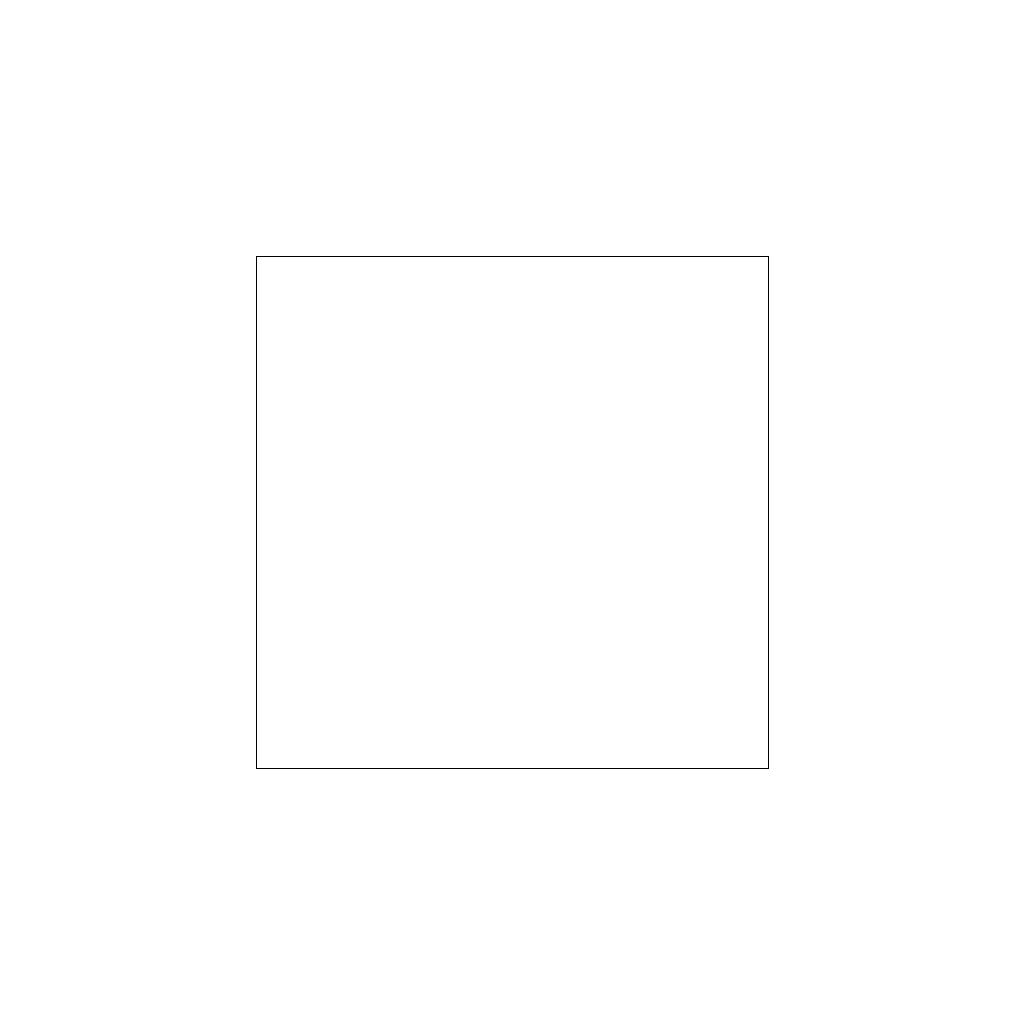

In [22]:
plot_anchors([1], [1])

4 Anchors


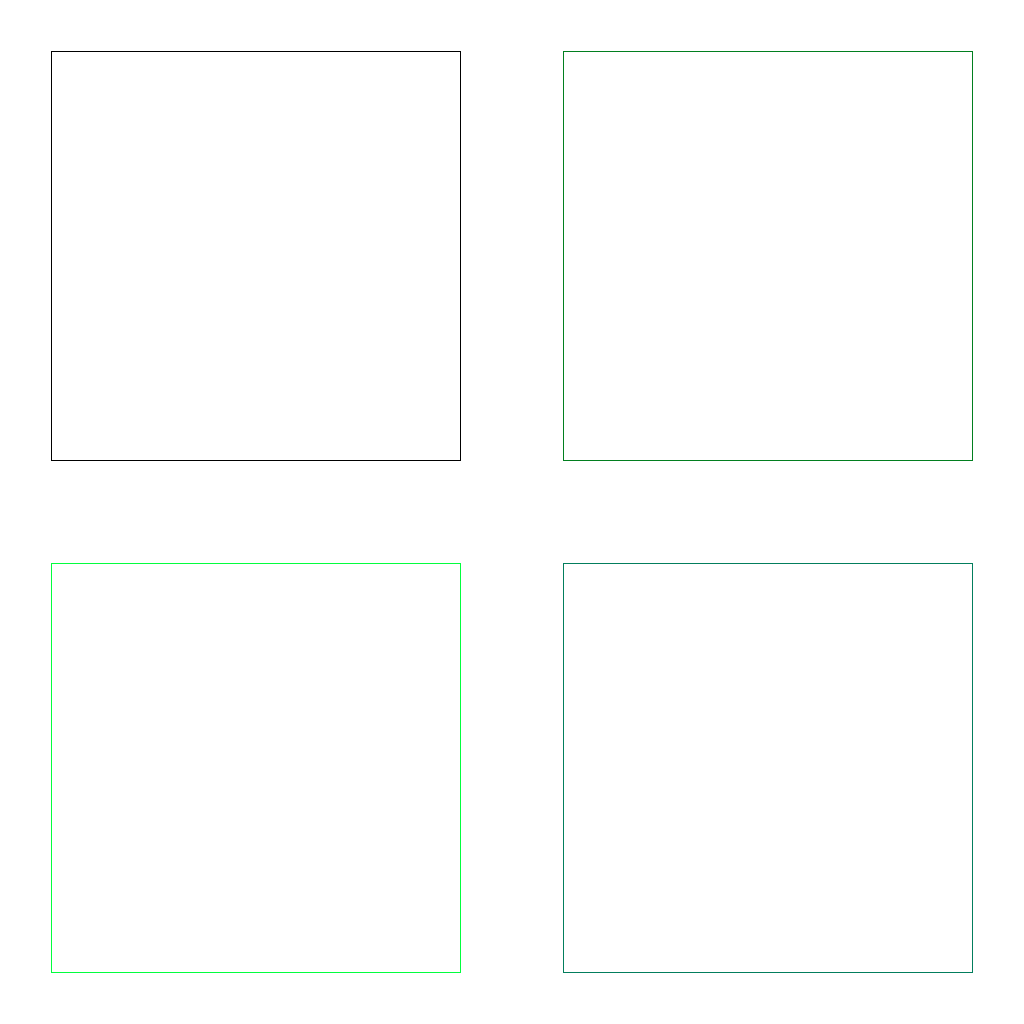

In [24]:
plot_anchors([2], [1], scales=[0.4, 0.6])